#### IMPORTING THE LIBRARYS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#### LOADING THE DATA

In [2]:
df_iris=pd.read_csv("iris.csv") 
df_iris=df_iris.sample(frac=1)

df_iris

,sepal length,sepal width,petal length,petal width,target
111,6.4,2.7,5.3,1.9,Iris-virginica
19,5.1,3.8,1.5,0.3,Iris-setosa
39,5.1,3.4,1.5,0.2,Iris-setosa
94,5.6,2.7,4.2,1.3,Iris-versicolor
112,6.8,3.0,5.5,2.1,Iris-virginica
...,...,...,...,...,...
30,4.8,3.1,1.6,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
102,7.1,3.0,5.9,2.1,Iris-virginica


#### VISUALIZING DATA

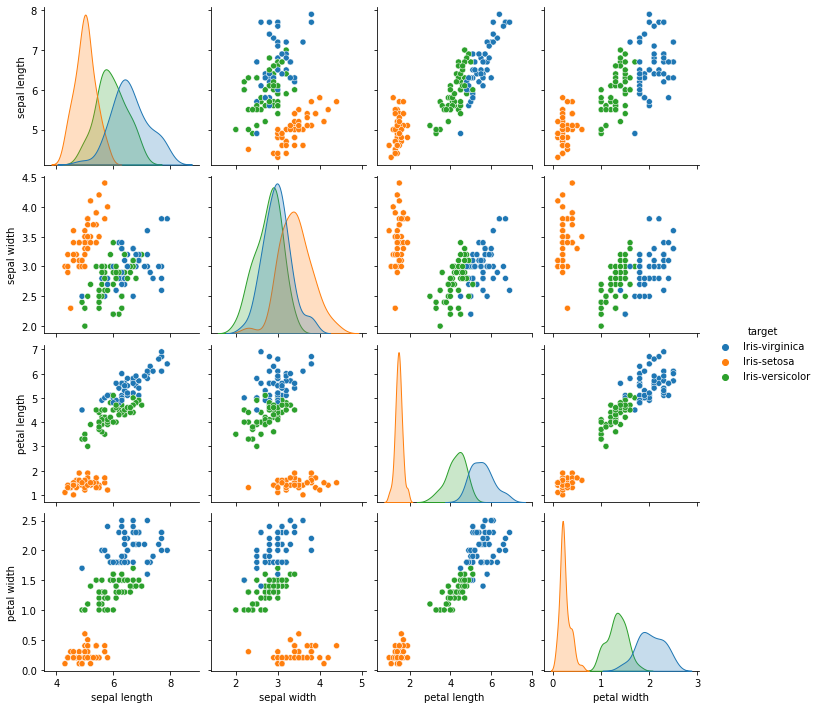

In [9]:
#sns.scatterplot(data=df_iris) 
sns.pairplot(data=df_iris,hue="target",kind="scatter") 
plt.show()

#### PREPARING DATA

here we separate the desired value into one array called target and all the features in another array

In [10]:
target=df_iris["target"].array
df_features=df_iris.drop(columns=["target"]) 

X=df_features.values 

y=target 

#### TRAINING MODEL(old way)

In [11]:
def getModel():
    #return LogisticRegression()
    return RandomForestClassifier()
    #return KNeighborsClassifier() 


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = getModel().fit(X_train,y_train)

score = model.score(X_test, y_test) 

print('accuracy =', score)  

accuracy = 1.0


#### TRAINING MODEL(USING CROSS VALIDATION)

In [13]:
scores = cross_val_score(getModel(),X,y,cv=10)

print('accuracy cv = ',np.mean(scores)) 
scores

accuracy cv =  0.9533333333333334


array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 1.        , 0.93333333, 0.93333333, 1.        ])

#### VISUALIZING CONFUSION MATRIX

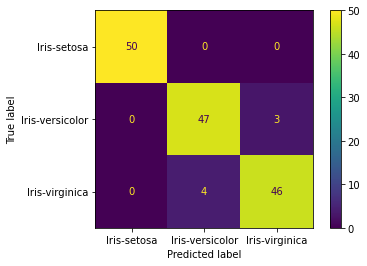

In [14]:
y_pred = cross_val_predict(getModel(),X,y,cv=10)

cm = confusion_matrix(y,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = model.classes_)

disp.plot()

plt.show()